19.9570045924421
-16.11576767322131
16.11576767322131
-19.9570045924421
24.560663346417208
-7.400933453555587
7.400933453555587
-24.560663346417208


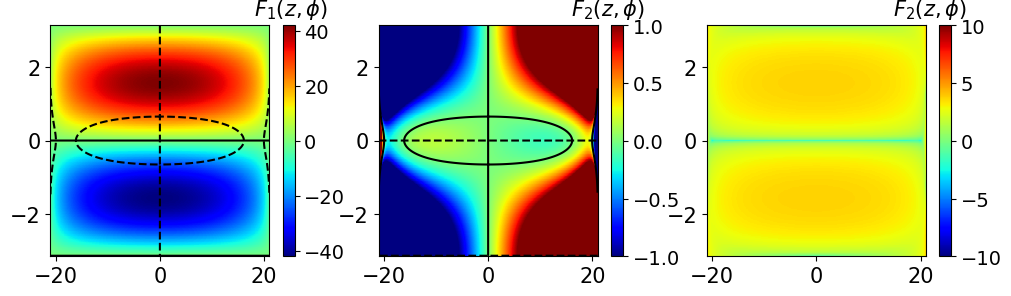

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import lineStyles

N = 21
gamma = 10
k = 1
beta = 0.0
delta = 0.0
n = 0
z_pp_0 = +((N + 2) ** 2 - (2 * gamma ** 2) / (k**2) + ((2 * gamma) / (k ** 2)) * (gamma ** 2 - 4 * k * (-1) ** n * (1 + N)) ** 0.5) ** 0.5
z_mm_0 = -((N + 2) ** 2 - (2 * gamma ** 2) / (k**2) - ((2 * gamma) / (k ** 2)) * (gamma ** 2 - 4 * k * (-1) ** n * (1 + N)) ** 0.5) ** 0.5
z_pm_0 = +((N + 2) ** 2 - (2 * gamma ** 2) / (k**2) - ((2 * gamma) / (k ** 2)) * (gamma ** 2 - 4 * k * (-1) ** n * (1 + N)) ** 0.5) ** 0.5
z_mp_0 = -((N + 2) ** 2 - (2 * gamma ** 2) / (k**2) + ((2 * gamma) / (k ** 2)) * (gamma ** 2 - 4 * k * (-1) ** n * (1 + N)) ** 0.5) ** 0.5
n = 1
z_pp_1 = +((N + 2) ** 2 - (2 * gamma ** 2) / (k**2) + ((2 * gamma) / (k ** 2)) * (gamma ** 2 - 4 * k * (-1) ** n * (1 + N)) ** 0.5) ** 0.5
z_mm_1 = -((N + 2) ** 2 - (2 * gamma ** 2) / (k**2) - ((2 * gamma) / (k ** 2)) * (gamma ** 2 - 4 * k * (-1) ** n * (1 + N)) ** 0.5) ** 0.5
z_pm_1 = +((N + 2) ** 2 - (2 * gamma ** 2) / (k**2) - ((2 * gamma) / (k ** 2)) * (gamma ** 2 - 4 * k * (-1) ** n * (1 + N)) ** 0.5) ** 0.5
z_mp_1 = -((N + 2) ** 2 - (2 * gamma ** 2) / (k**2) + ((2 * gamma) / (k ** 2)) * (gamma ** 2 - 4 * k * (-1) ** n * (1 + N)) ** 0.5) ** 0.5

print(z_pp_0)
print(z_mm_0)
print(z_pm_0)
print(z_mp_0)

print(z_pp_1)
print(z_mm_1)
print(z_pm_1)
print(z_mp_1)

# PARAMETROS INICIALES (P = CANTIDAD CONSERVADA, X = PORCENTAJE DE INFORMACIÓN INICIAL EN DIMERO 2) ####### Vale pico esto, encuentra los puntos estacionarios como la gente
dz = 0.005
dphi = 0.005
z = np.arange(- N + dz, N - dz, dz) #
phi = np.arange(-np.pi - dphi, np.pi + dphi, 0.02)#n * np.pi
Z, PHI = np.meshgrid(z, phi)
F1 = 2 * k * np.sqrt(N ** 2 - Z ** 2) * np.sin(PHI)
#F2 = Z * np.cos(PHI) * ((N + 2) ** 2 - Z ** 2) - 2 * gamma * Z * np.sqrt(N ** 2 - Z ** 2) + delta * np.sqrt(N ** 2 - Z ** 2) * ((N + 2) ** 2 - Z ** 2)
F2 = - ((2 * k * Z) / (np.sqrt(N ** 2 - Z ** 2))) * np.cos(PHI) + ((4 * gamma * Z) / ((N + 2) ** 2 - Z ** 2)) - 2 * delta

fig, ax = plt.subplots(1, 3, figsize=(12, 3), dpi=100)

pcm = ax[0].pcolormesh(z, phi, F1, cmap="jet", shading='auto')
cbar = plt.colorbar(pcm, aspect=20)
cbar.set_label(r'$F_1(z, \phi)$', rotation=0, size=15, labelpad=-39, y=1.12)
ax[0].tick_params(labelsize=15, direction='out')
cbar.ax.tick_params(labelsize=14)
ax[0].contour(Z, PHI, F1, levels=[0], colors='k')
ax[0].contour(Z, PHI, F2, levels=[0], colors='k', linestyles="--")

pcm = ax[1].pcolormesh(z, phi, F2, cmap="jet", vmin=-1, vmax=1, shading='auto')
cbar = plt.colorbar(pcm, aspect=20)
cbar.set_label(r'$F_2(z, \phi)$', rotation=0, size=15, labelpad=-52, y=1.12)
ax[1].tick_params(labelsize=15, direction='out')
cbar.ax.tick_params(labelsize=14)
ax[1].contour(Z, PHI, F2, levels=[0], colors='k')
ax[1].contour(Z, PHI, F1, levels=[0], colors='k', linestyles="--")

pcm = ax[2].pcolormesh(z, phi, np.log(np.sqrt(F1 ** 2 + F2 ** 2)), cmap="jet", vmin=-10, vmax=10, shading='auto')
cbar = plt.colorbar(pcm, aspect=20)
cbar.set_label(r'$F_2(z, \phi)$', rotation=0, size=15, labelpad=-52, y=1.12)
ax[2].tick_params(labelsize=15, direction='out')
cbar.ax.tick_params(labelsize=14)
ax[2].set_ylim(-0.3, 0.3)